In [1]:
import time
import copy

import numpy as np

import rlrisk.env
import rlrisk.simple_policy
import rlrisk.train

In [6]:
game_spec = dict(
    n_players=3,
    n_territories=8,
    baseline_reinforcements=3,
    reinforcements_per_territory=0,
    n_attacks_per_turn=5,
    max_turns=50
)

In [7]:
p = rlrisk.simple_policy.SimplePolicyPlayer(0.001)
#p = vpg.VPGPlayer(0.005, 0.001, 50)

In [8]:
players = [p, p, rlrisk.env.DumbPlayer()]

In [9]:
rlrisk.train.train(game_spec, players, 100, 1000, [0,1,2])

epoch 0
player 0  Win percentage: 0.000 Average game length: 62.188 Loss: -0.000
player 1 player 2 epoch 1
player 0  Win percentage: 0.000 Average game length: 62.355 Loss: -0.000
player 1 player 2 epoch 2
player 0  Win percentage: 0.000 Average game length: 62.532 Loss: -0.000
player 1 player 2 epoch 3
player 0  Win percentage: 0.000 Average game length: 62.774 Loss: -0.000
player 1 player 2 epoch 4
player 0  Win percentage: 0.000 Average game length: 62.620 Loss: -0.000
player 1 player 2 epoch 5
player 0  Win percentage: 0.000 Average game length: 62.327 Loss: -0.000
player 1 player 2 epoch 6
player 0  Win percentage: 0.000 Average game length: 62.496 Loss: -0.000
player 1 player 2 epoch 7
player 0  Win percentage: 0.000 Average game length: 62.300 Loss: -0.000
player 1 player 2 epoch 8
player 0  Win percentage: 0.001 Average game length: 62.373 Loss: 0.003
player 1 player 2 epoch 9
player 0  Win percentage: 0.001 Average game length: 62.322 Loss: 0.002
player 1 player 2 epoch 10
pla

KeyboardInterrupt: 

In [14]:
_, _, history = rlrisk.env.play_games(game_spec, players, np.arange(1000), record=True)

In [27]:
len(history)

394

In [32]:
player_idxs = np.array([data[1] for data in history])
all_states = np.array([data[2] for data in history])

In [33]:
player_idxs.shape

(394, 1000)

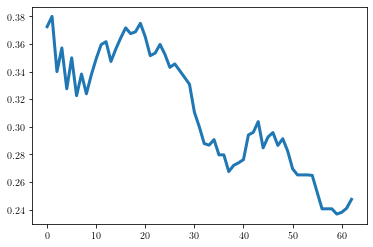

In [42]:
MAT = rlrisk.env.states_to_territory_matrix(all_states[player_idxs[:,0] == 0, 0, :])

total_armies = np.sum(MAT[:,:,0], axis=1)
import matplotlib.pyplot as plt
plt.plot(np.sum(MAT[:,:,0] * MAT[:,:,1], axis=1) / total_armies)
plt.show()

In [19]:
SS.shape
SS = all_states[:,player_idxs[:,all_states[:,:,rlrisk.env.n_max_players:].reshape(
    all_states.shape[0], rlrisk.env.n_max_territories, rlrisk.env.n_max_players + 1 
)

In [26]:
np.sum(SS[:,:,0] * SS[:,:,1],axis=1)

array([19., 19., 19., 18., 18., 17., 16., 19., 19., 19., 17., 16., 15., 14., 17., 17., 17., 17., 17., 17., 17., 20., 20., 20., 19., 17., 16., 16., 19., 19., 18., 18., 18., 18., 18., 18., 18., 21.,
       21., 21., 19., 17., 17., 17., 20., 20., 20., 20., 20., 20., 20., 23., 23., 23., 21., 20., 20., 20., 23., 23., 23., 23., 23., 23., 23., 26., 26., 26., 26., 26., 26., 26., 29., 29., 29., 29.,
       29., 29., 29., 32., 32., 32., 32., 31., 31., 31., 34., 34., 34., 34., 32., 30., 30., 30., 33., 33., 33., 33., 33., 33., 33., 36., 36., 36., 36., 36., 36., 36., 39., 39., 39., 39., 39., 39.,
       39., 42., 42., 42., 40., 40., 40., 40., 43., 43., 43., 43., 42., 42., 42., 45., 45., 45., 45., 45., 45., 45., 48., 46., 46., 46., 45., 43., 42., 42., 45., 45., 45., 45., 44., 44., 44., 47.,
       47., 47., 47., 47., 47., 47., 50., 50., 50., 50., 49., 47., 46., 46., 49., 47., 47., 47., 47., 47., 45., 44., 43., 46., 46., 46., 46., 46., 45., 43., 43., 45., 44., 44., 42., 42., 40., 38.,
       38., 38.

In [13]:
np.unique(rlrisk.env.play_games(game_spec, players, np.arange(1000))[0], return_counts=True)

(array([0, 1, 3], dtype=int32), array([715, 258,  27]))